In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_raw: pd.DataFrame = pd.read_csv(
    'data/processed_data.csv',
    parse_dates=["Time"],
    index_col=[0],
    sep=';'
)

# Clean the name of the columns, put in lower case and replace spaces by underscores
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')

In [42]:
df_raw = df_raw.drop(columns=['unnamed:_58'])

In [43]:
def remove_rows_over_threshold(df, columns, threshold=1e4):
    """
    Remove rows where any of the specified columns have values greater than a threshold.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to check for values over the threshold.
    threshold (float): The threshold value. Default is 1e8.

    Returns:
    pd.DataFrame: A DataFrame with rows removed where any specified column exceeds the threshold.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Create a mask to identify rows where any specified column exceeds the threshold
    mask = (df_cleaned[columns] > threshold).any(axis=1)

    # Drop rows where the mask is True
    df_cleaned = df_cleaned[~mask]

    return df_cleaned

In [44]:
# Remove columns
df_raw = df_raw.drop(columns=['horas_de_funcionamento', 'transporte,_iluminação,_etc', 'horas', 'produção', 'transp.compart.', 'md1', 'md2', 'md3', 'md4', 'md5'])

# Columns to check for maximum values
columns_to_check = [
    'ceee', 'relação_ar_/_pó', 'motores_moinho', 'exaustor', 'separador',
    'gases_do_forno', 'umidade', 'aditivo.1', 'mda', 'motores_440',
    'compressores', 'energia_total'
]

# Remove rows with maximum values
df_raw = remove_rows_over_threshold(df_raw, columns_to_check)

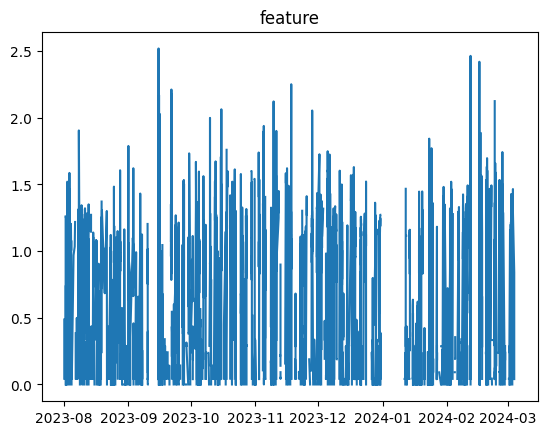

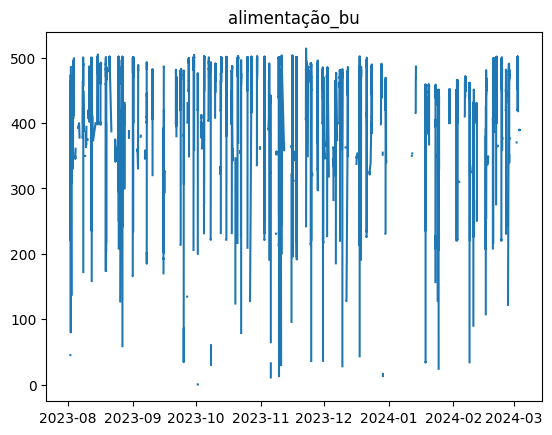

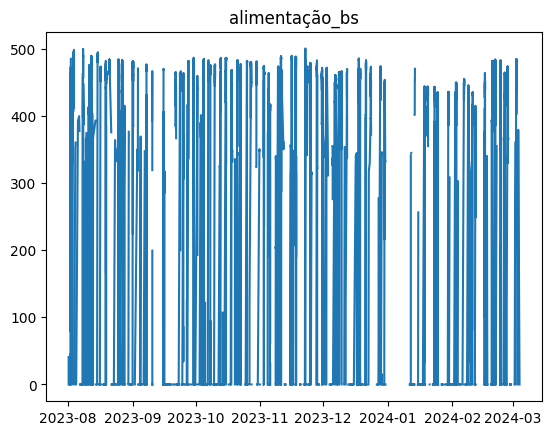

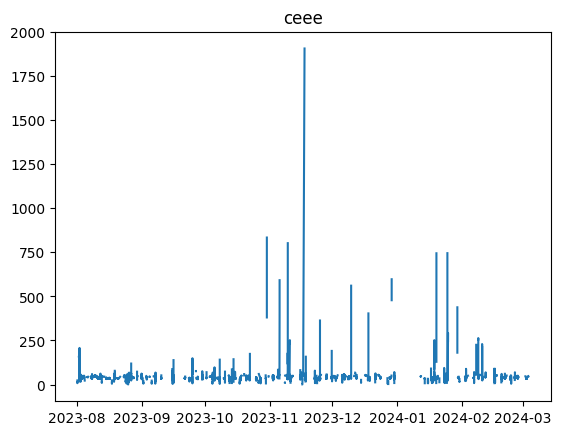

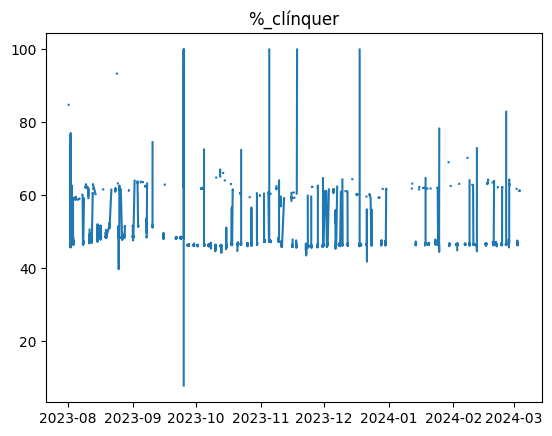

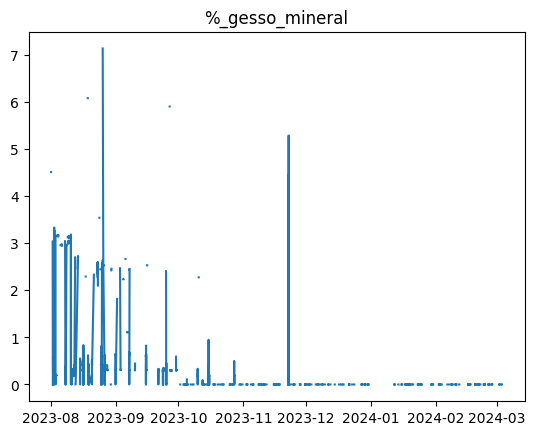

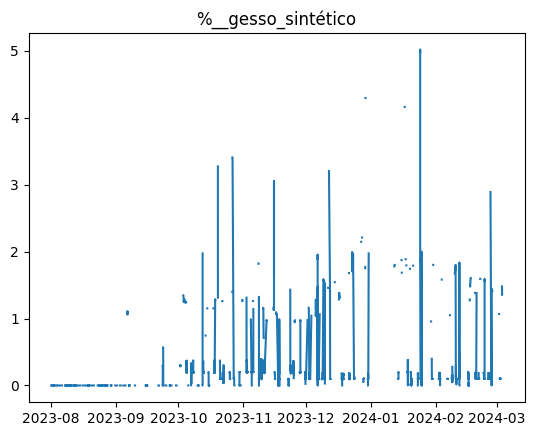

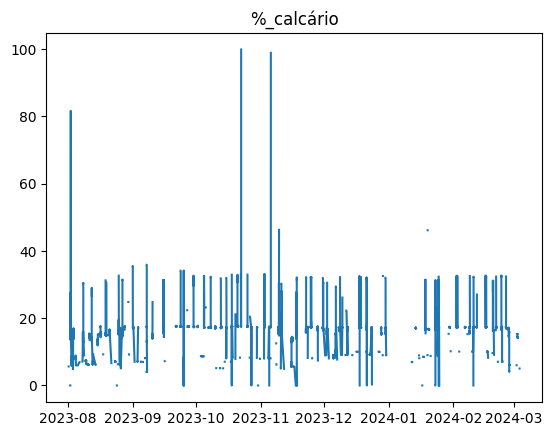

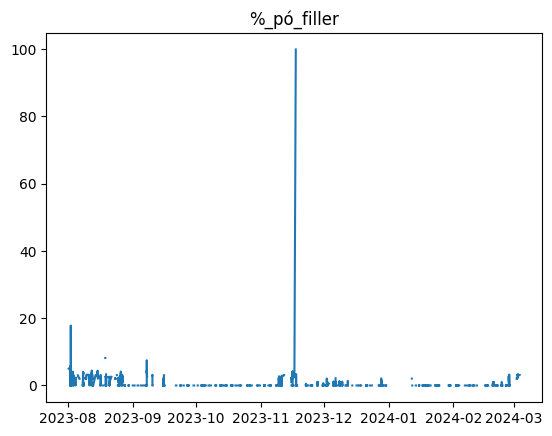

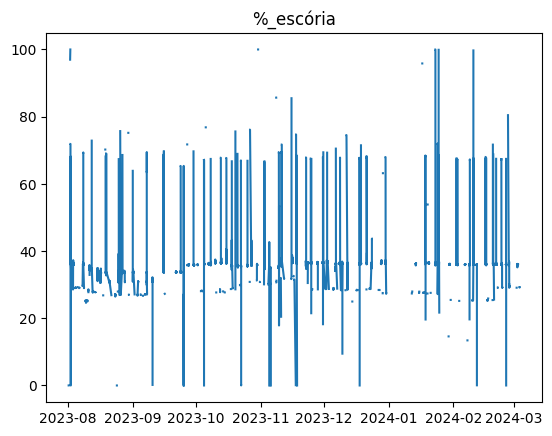

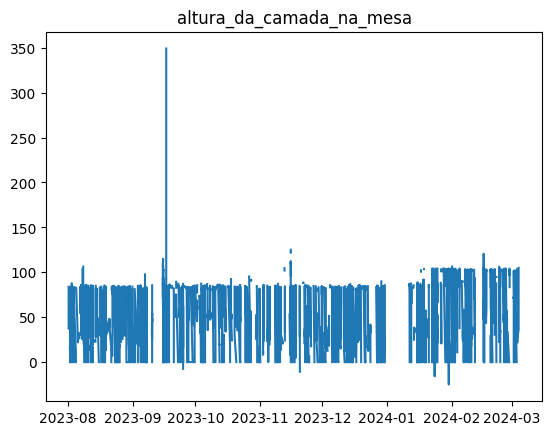

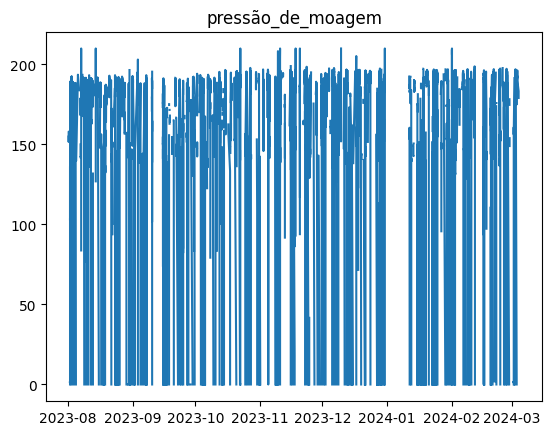

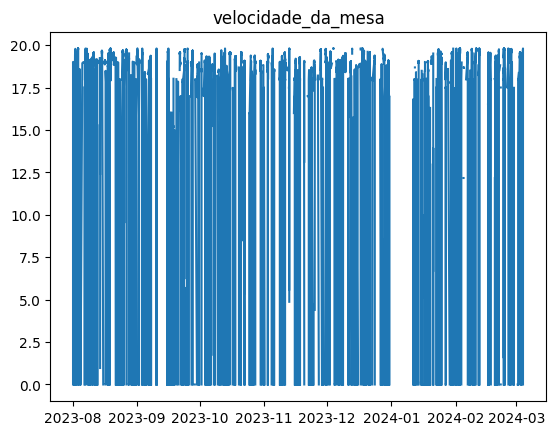

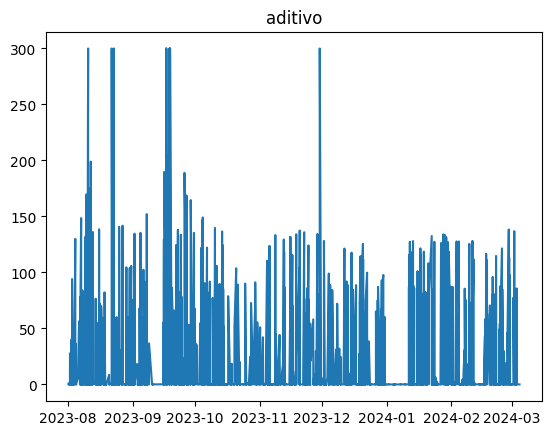

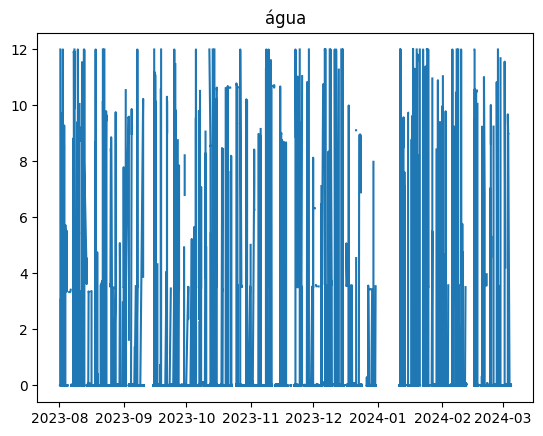

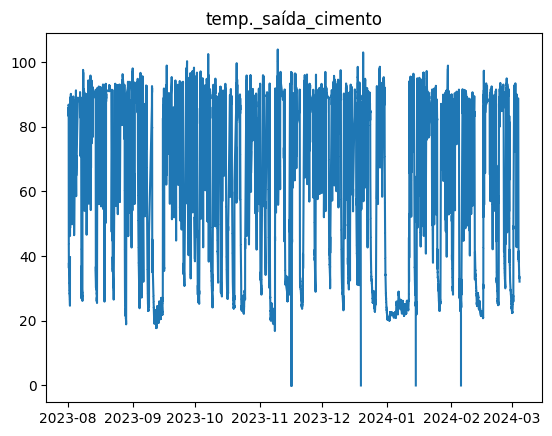

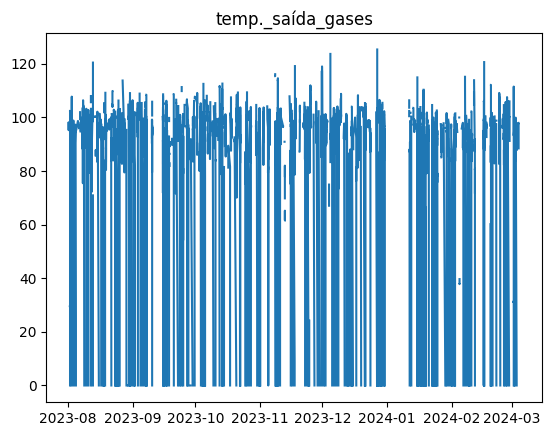

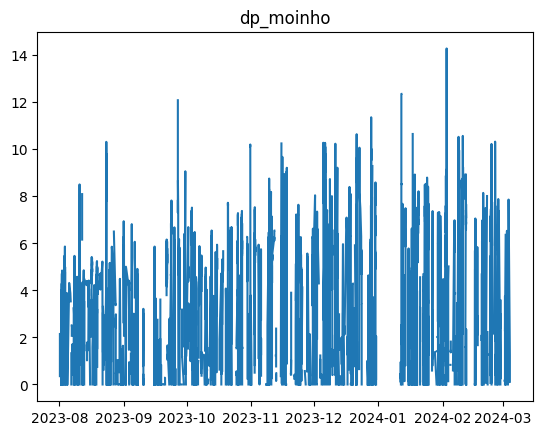

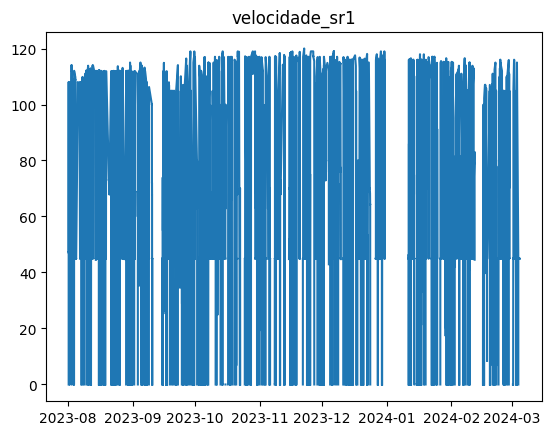

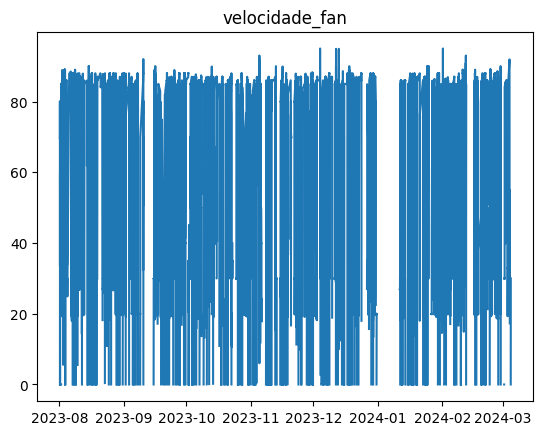

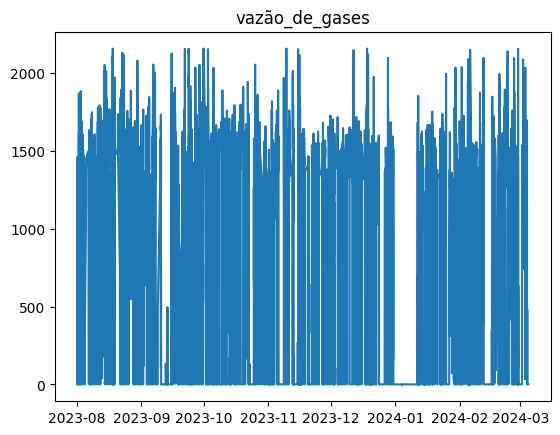

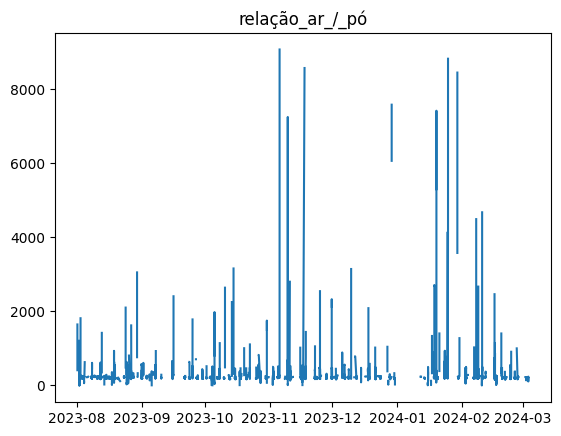

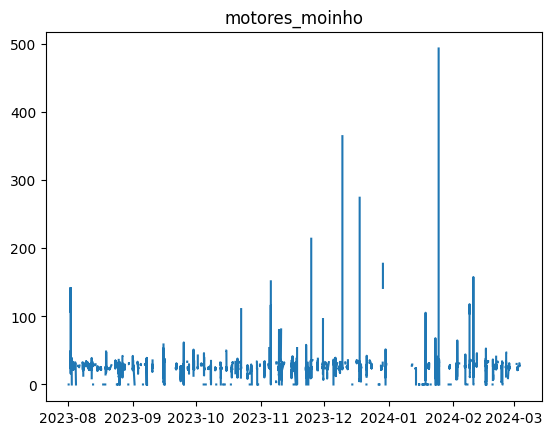

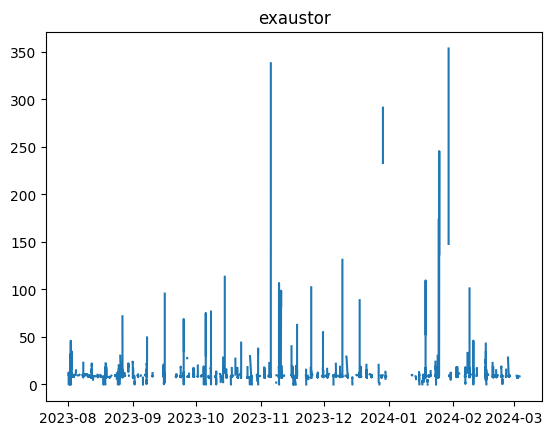

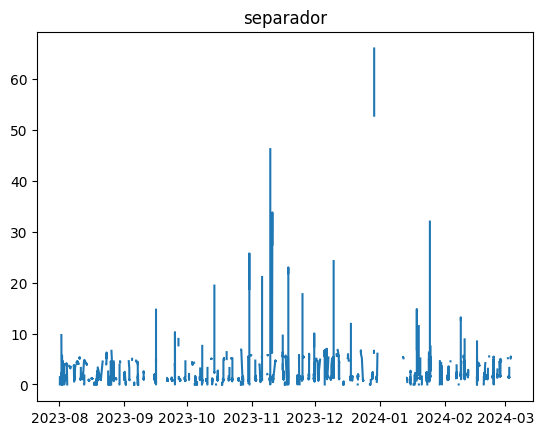

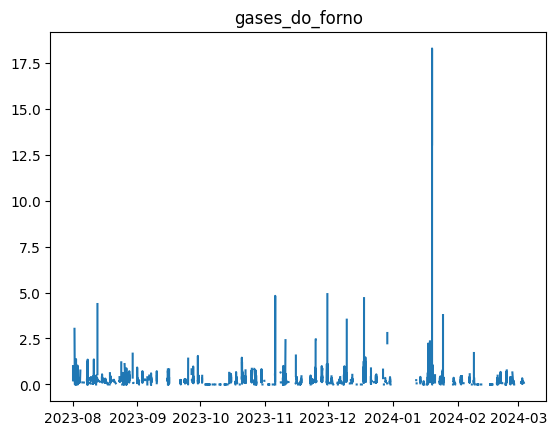

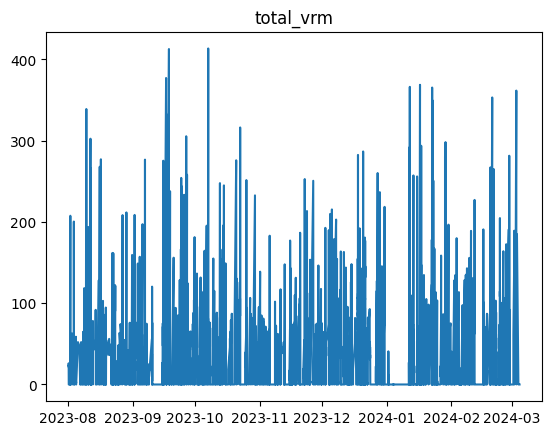

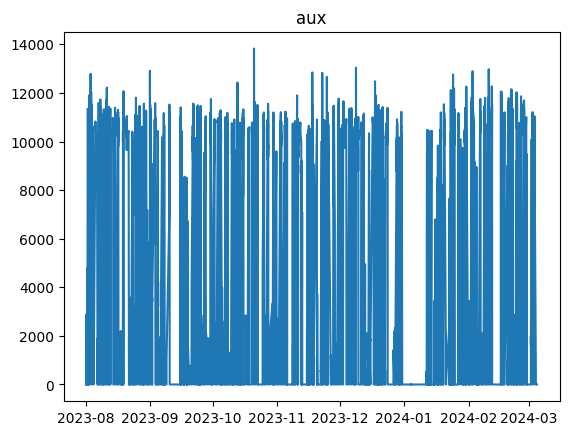

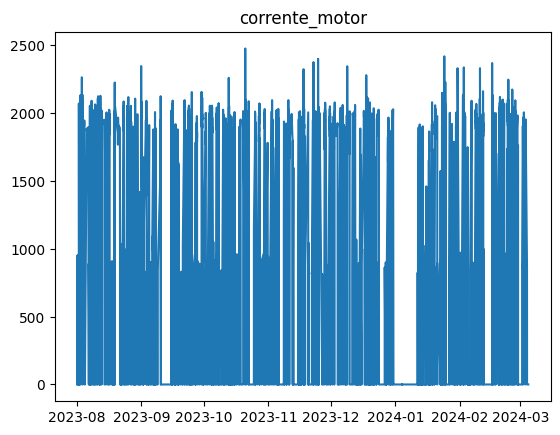

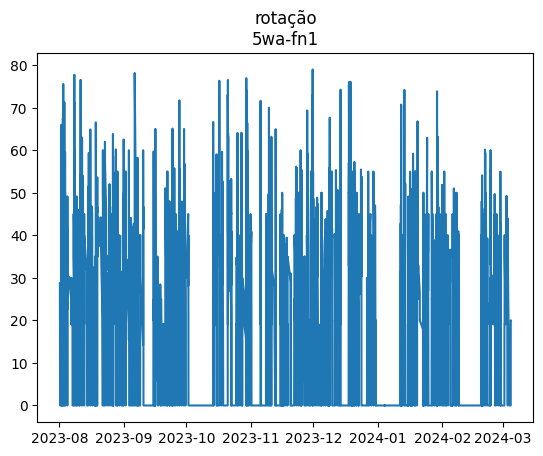

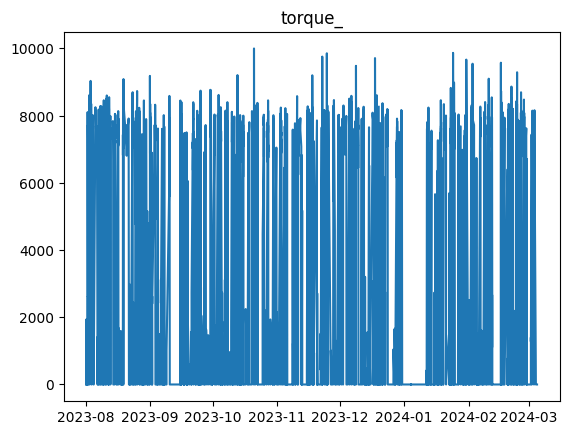

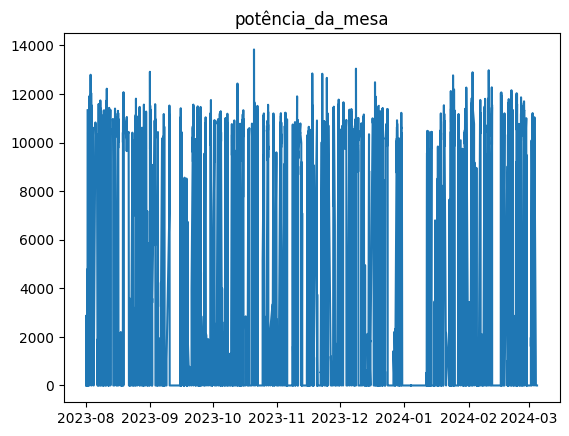

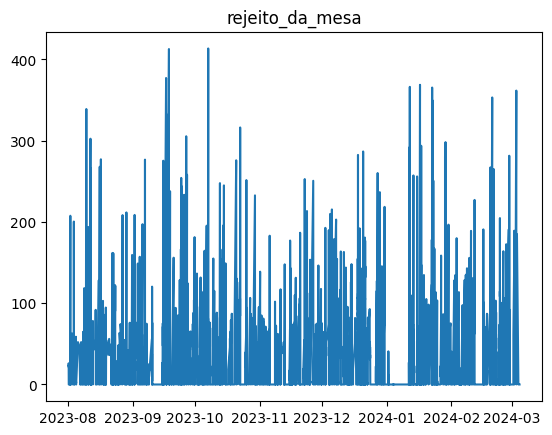

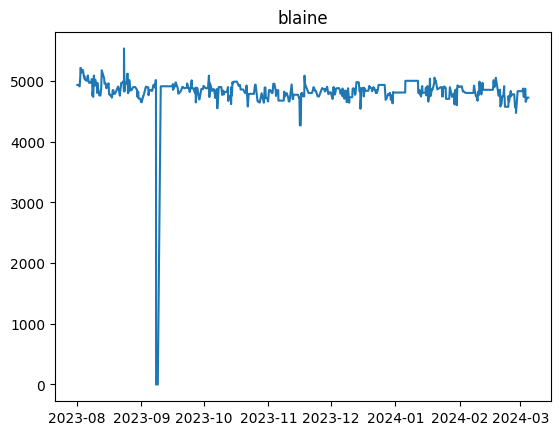

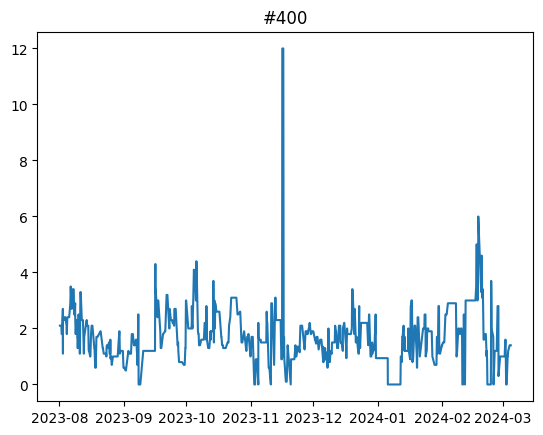

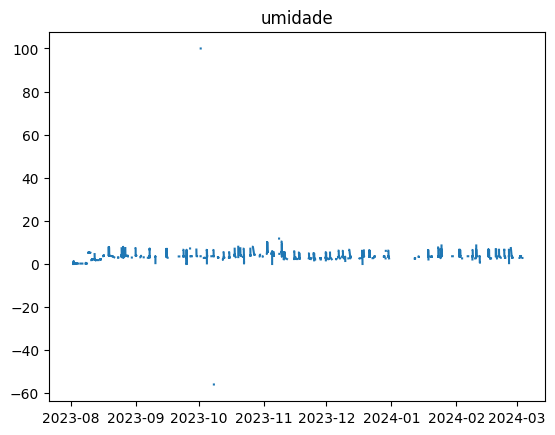

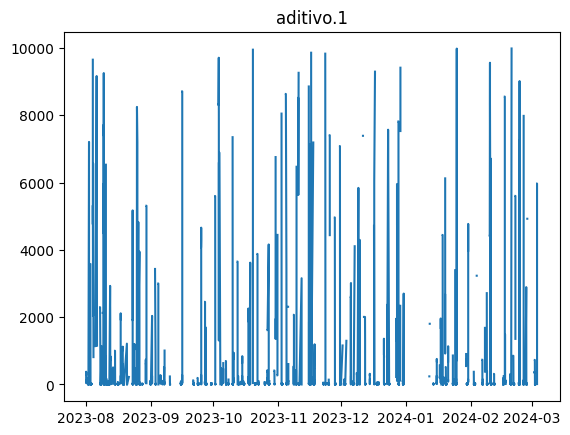

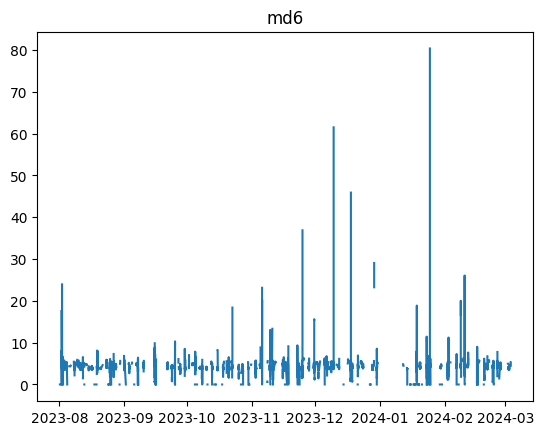

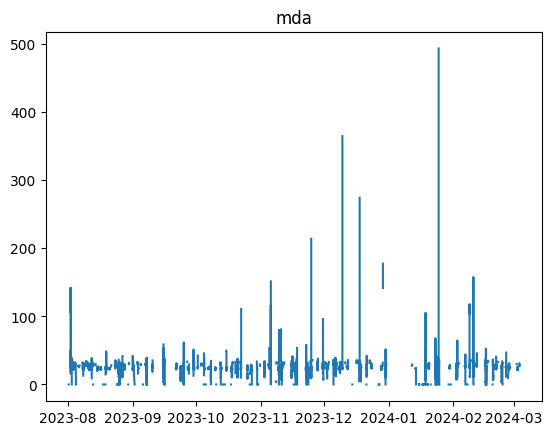

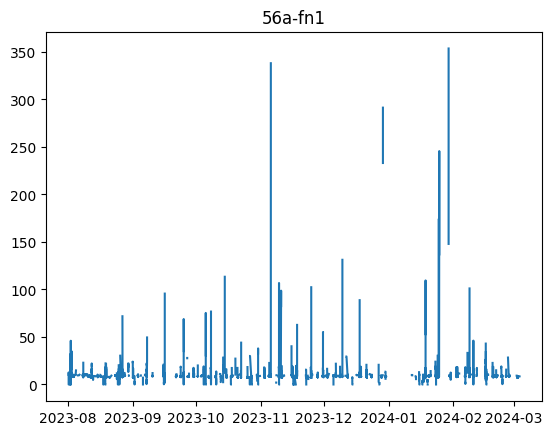

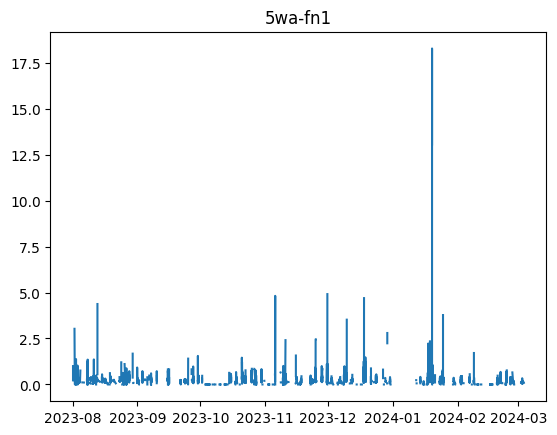

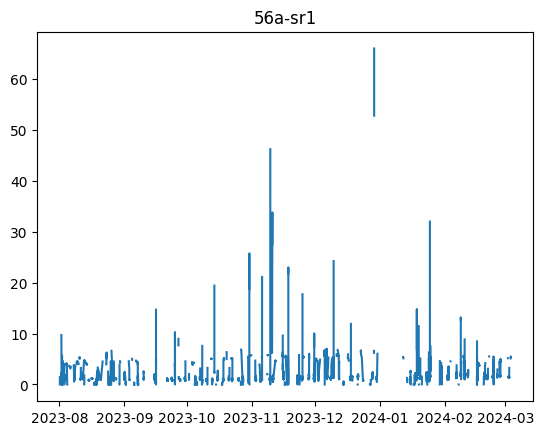

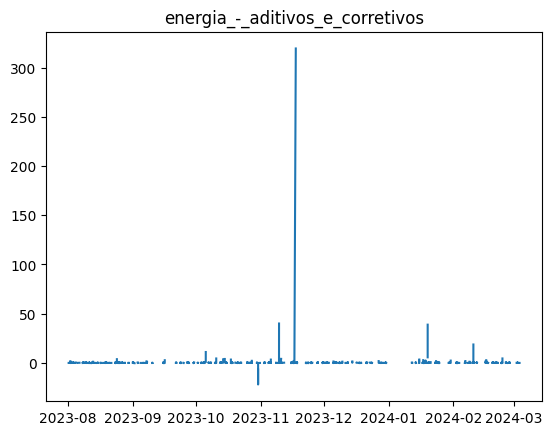

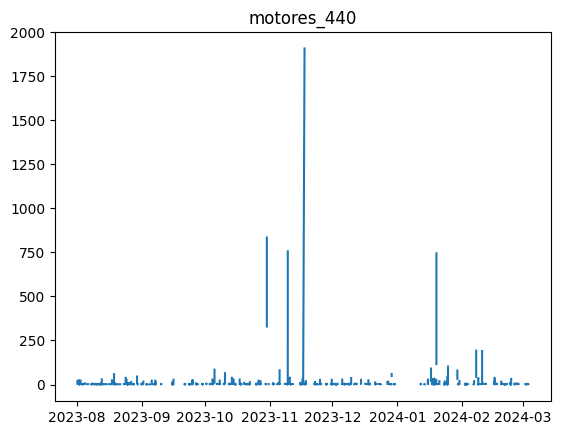

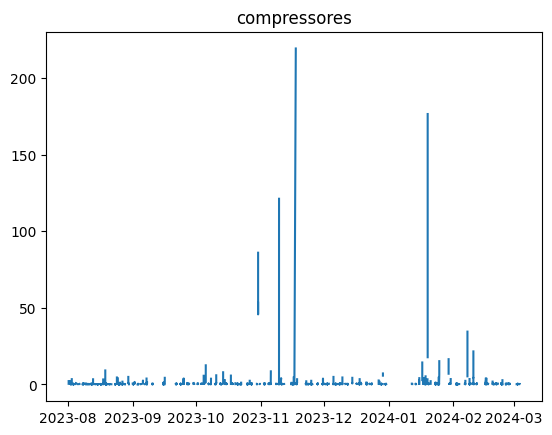

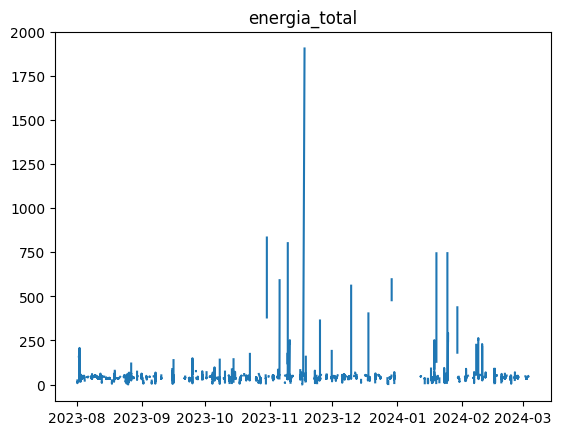

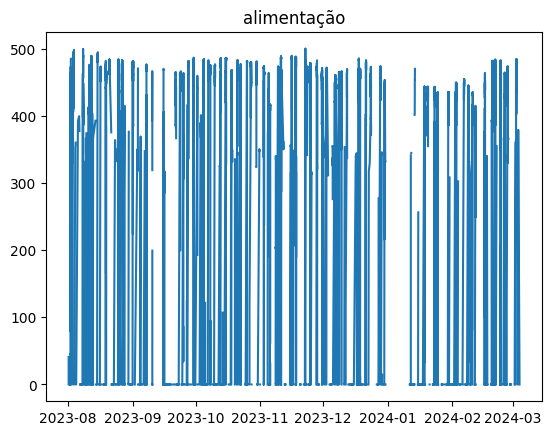

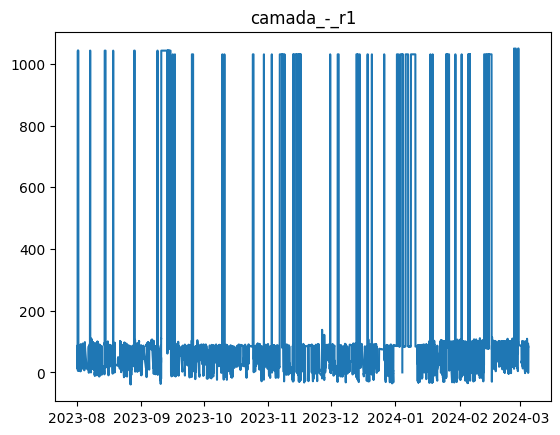

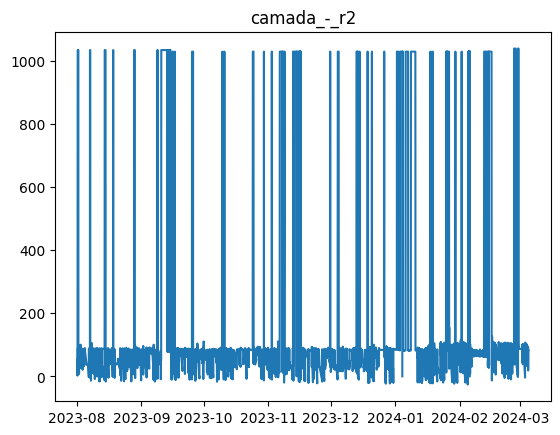

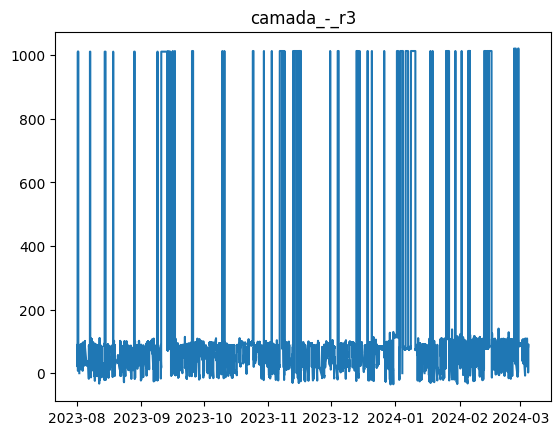

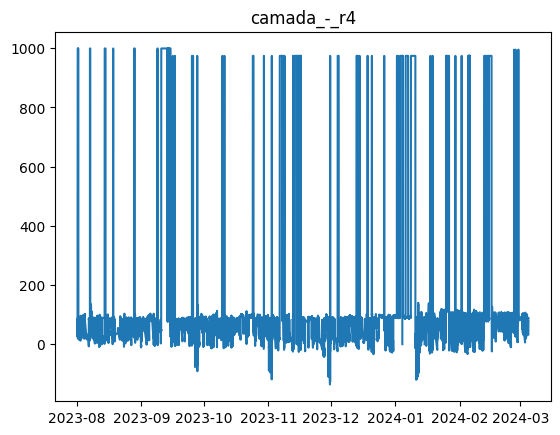

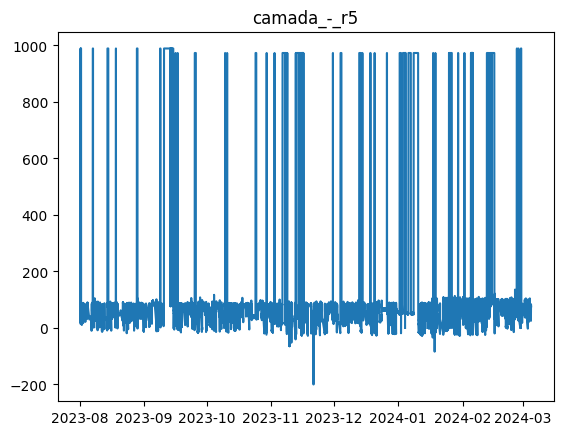

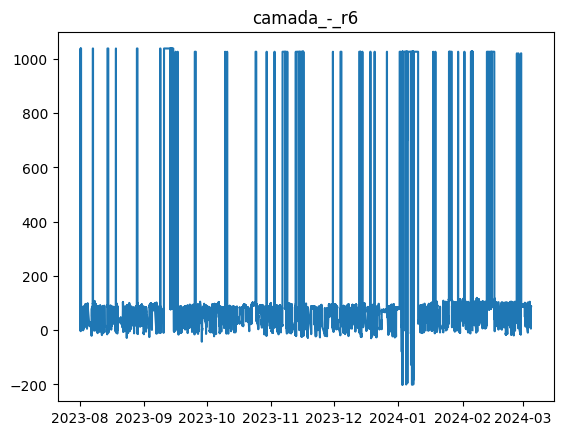

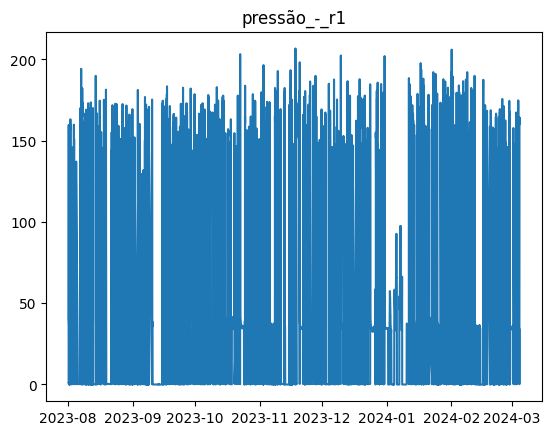

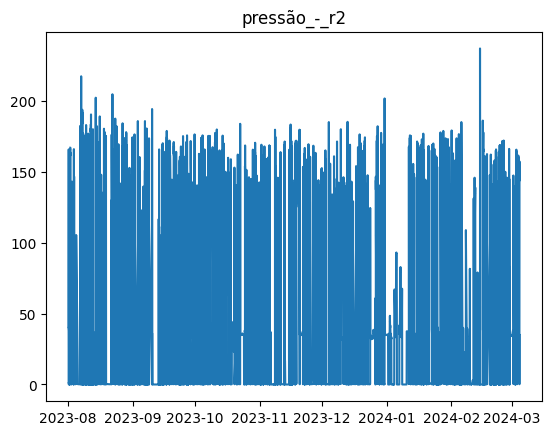

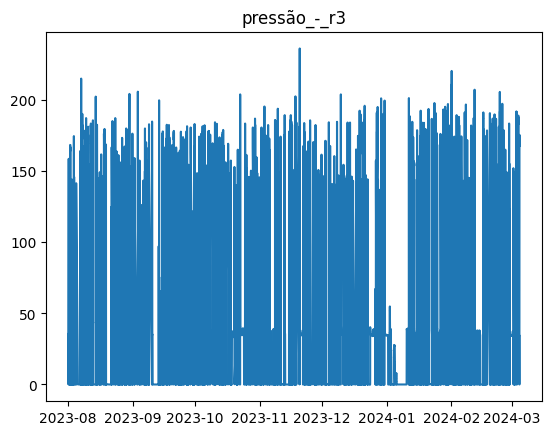

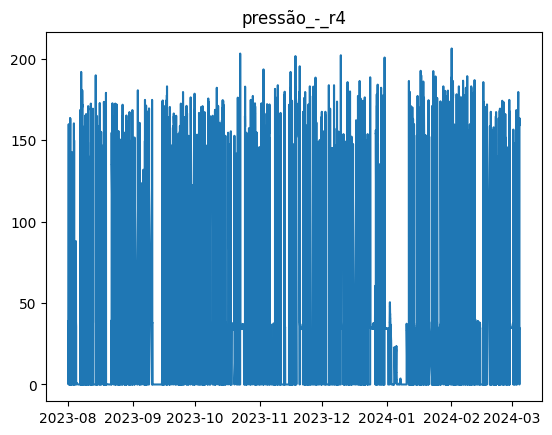

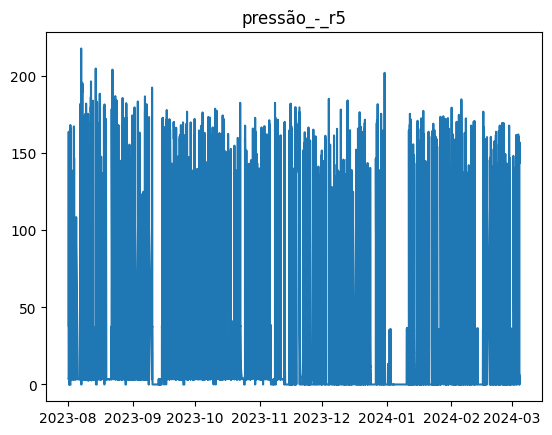

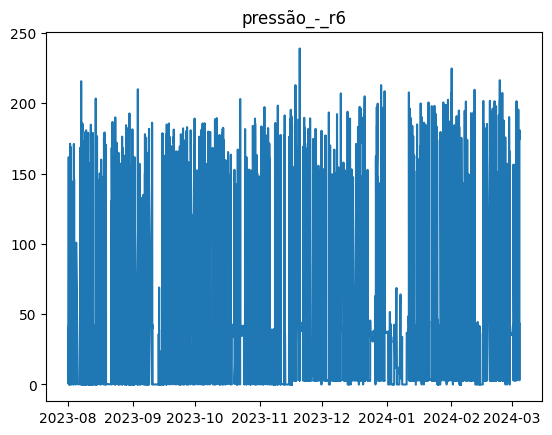

In [45]:
# plot one all columns in diferent plots
for column in df_raw.columns:
    plt.figure()
    plt.plot(df_raw[column])
    plt.title(column)
    plt.show()

In [46]:
threshold = 1500
df = df_raw[df_raw['corrente_motor'] > threshold]

# Drop all rows with NaN values
df = df.dropna().copy()

In [3]:
def remove_problematic_columns(df):
    # Lista para armazenar colunas a serem removidas
    columns_to_drop = []

    # Verifica cada coluna no DataFrame
    for col in df.columns:
        # Verifica se a coluna contém tipos de dados não numéricos
        if df[col].dtype == 'object':
            print(f"Coluna '{col}' removida: contém tipo de dados 'object'.")
            columns_to_drop.append(col)
            continue

        # Verifica se a coluna contém valores não numéricos
        if not np.isfinite(df[col]).all():
            print(f"Coluna '{col}' removida: contém valores não numéricos (NaN ou infinito).")
            columns_to_drop.append(col)

    # Remove as colunas problemáticas
    df_cleaned = df.drop(columns=columns_to_drop)

    return df_cleaned
df = remove_problematic_columns(df)

Coluna 'Unnamed: 58' removida: contém tipo de dados 'object'.


In [47]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df.values)

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_normalized)

df_reduced = pd.DataFrame(X_reduced)

In [48]:
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.360914,-0.649083,2.784904,0.744611,5.707623,0.064803,1.979375,-2.356107,-0.491195,2.257936,...,-7.793431,0.201069,1.631455,-10.012628,4.597571,-5.646589,-9.792351,0.153026,-1.427070,0.642948
1,-0.269791,1.109110,-2.690335,-2.569388,2.355861,-0.212088,-0.815677,-0.814423,-0.464670,1.568040,...,-1.269690,-0.316974,0.056258,0.862643,0.003242,-0.634224,-0.777994,-0.746458,0.422358,1.320723
2,-0.261249,0.939245,-2.706628,-2.539493,2.466802,-0.157968,-0.837065,-0.823263,-0.654809,1.438098,...,-1.430408,-0.336875,-0.046123,0.605349,0.193967,-0.752415,-1.125510,-0.533087,0.400195,1.472988
3,-0.308125,0.817255,-2.799674,-2.572486,2.518140,-0.080204,-0.910057,-0.801220,-0.815827,1.287028,...,-1.448311,-0.392671,-0.223772,0.642262,0.244820,-0.705998,-1.243045,-0.350487,0.380018,1.613131
4,-0.305285,0.720831,-2.903465,-2.617635,2.533158,-0.012294,-0.985896,-0.768355,-0.951667,1.136099,...,-1.466268,-0.446330,-0.385197,0.689452,0.305084,-0.681568,-1.375197,-0.178812,0.392485,1.768783


In [49]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por cada componente: {explained_variance}")

Variância explicada por cada componente: [0.23308474 0.13112799 0.0929248  0.07939902 0.06299324 0.05500466
 0.03605441 0.03033798 0.02838531 0.02390714 0.02242851 0.01920842
 0.01791669 0.01623113 0.01526618 0.01390065 0.01209503 0.01188352
 0.01020524 0.00999787 0.00945754 0.0084839  0.00649492 0.00600929]


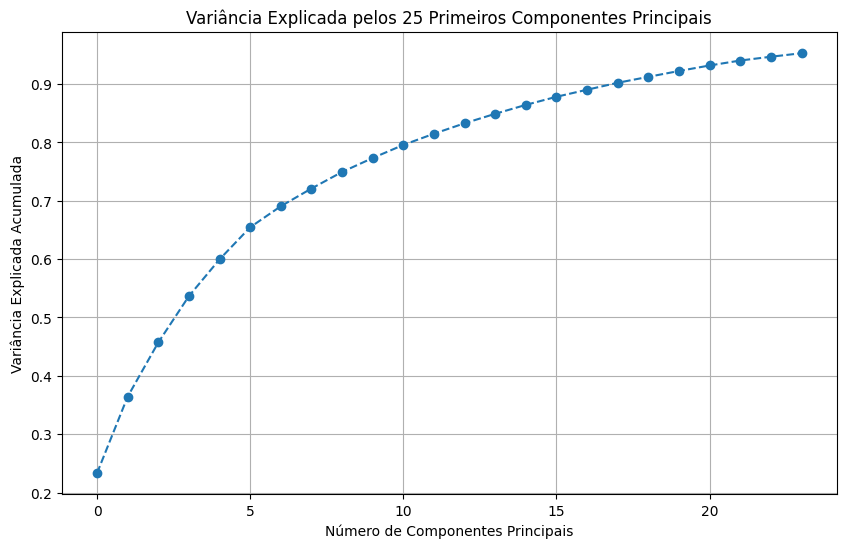

In [53]:
# Gráfico de variância explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelos 25 Primeiros Componentes Principais')
plt.grid(True)
plt.show()

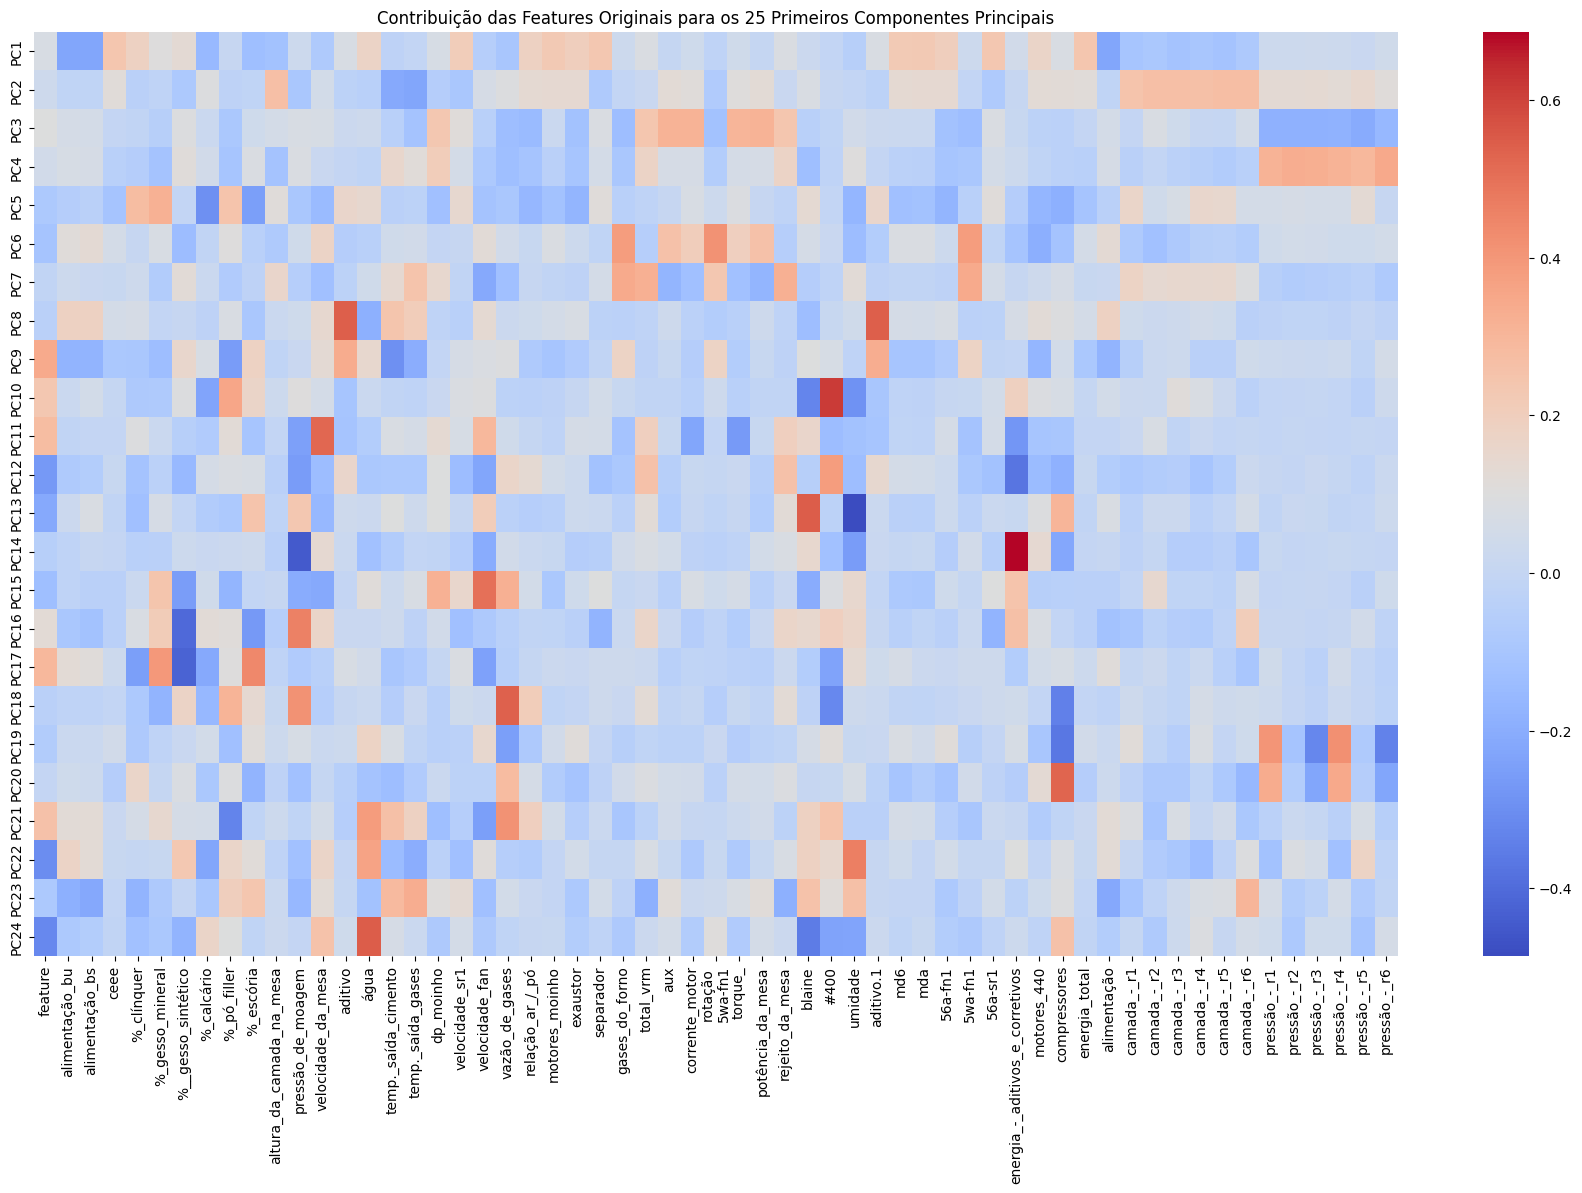

In [54]:
# Heatmap dos componentes principais
components_df = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(24)])
plt.figure(figsize=(22, 12))
sns.heatmap(components_df, cmap='coolwarm', annot=False)
plt.title('Contribuição das Features Originais para os 25 Primeiros Componentes Principais')
plt.show()

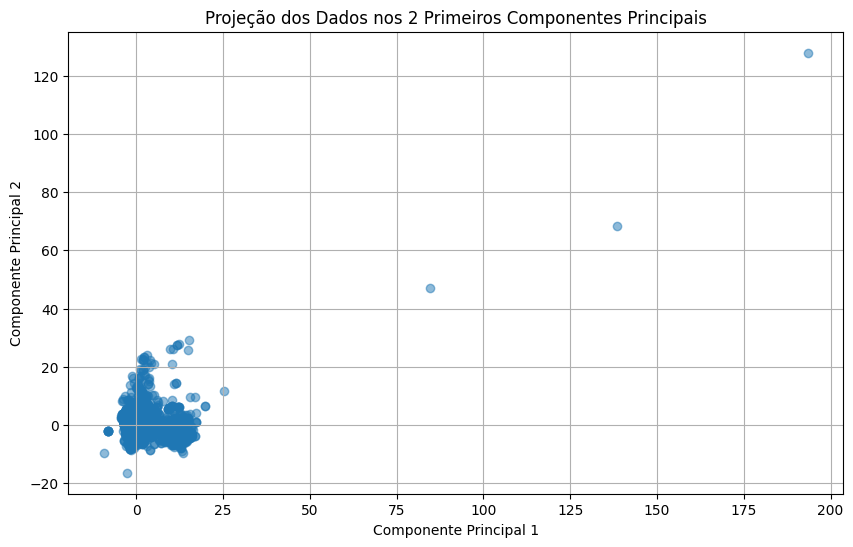

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção dos Dados nos 2 Primeiros Componentes Principais')
plt.grid(True)
plt.show()

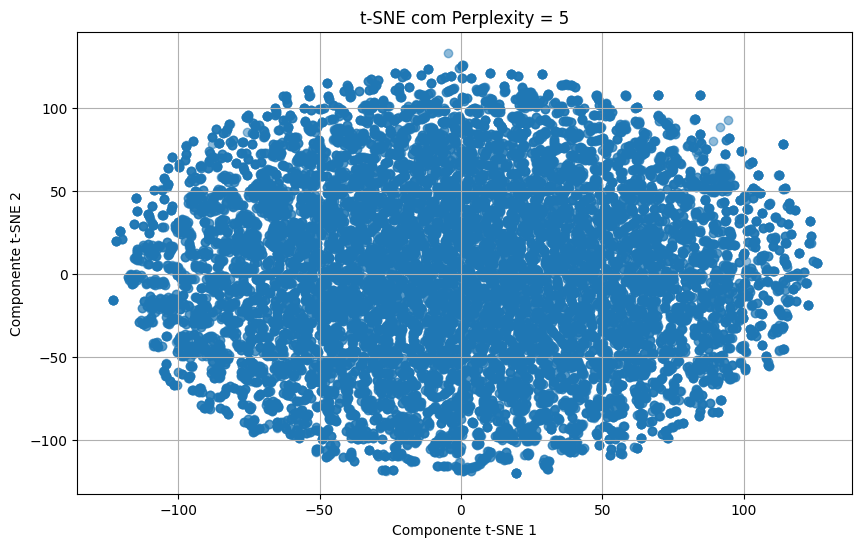

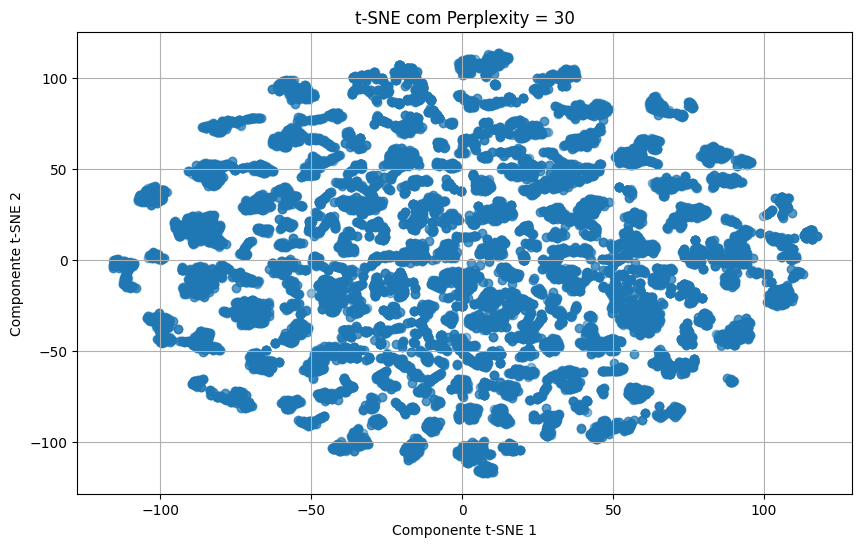

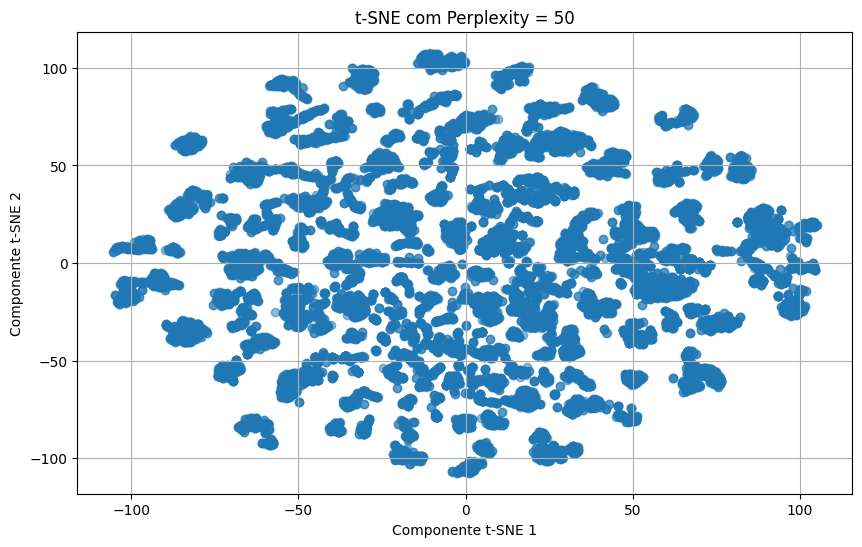

In [56]:
# Aplicar o t-SNE com diferentes valores de perplexity
perplexity_values = [5, 30, 50]  # Testar diferentes valores

for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_normalized)  # X_normalized são os dados normalizados

    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
    plt.title(f't-SNE com Perplexity = {perplexity}')
    plt.xlabel('Componente t-SNE 1')
    plt.ylabel('Componente t-SNE 2')
    plt.grid(True)
    plt.show()